In [37]:
# Import dependencies
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Part 1: Prepare the Data
Read myopia.csv into a Pandas DataFrame.

Note: This file can be found in your Module 20 Challenge files.
Remove the "MYOPIC" column from the dataset.

Note: The target column is needed for supervised machine learning, but it will make an unsupervised model biased. After all, the target column is effectively providing clusters already!
Standardise your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.

In [14]:
# Load file and display
path = 'Instructions/Resources/myopia.csv'

df = pd.read_csv(path)

df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [27]:
# Remove the "MYOPIC" column from the dataset
df_1 = df.drop(["MYOPIC"], axis=1)
df_1.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [16]:
# Identify all the possible values in the MYOPIC column
y = df['MYOPIC']
y.unique()

array([1, 0], dtype=int64)

In [28]:
# Scale the data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_1)
scaled_data[0:5]

array([[-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
        -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
         0.18405806,  0.49830393,  0.98713773,  1.0032415 ],
       [-0.42021911, -0.30861224, -0.1718398 ,  0.53591028, -0.96799728,
        -0.13076253, -0.99889822, -0.91206246, -0.36187479, -0.22140908,
        -0.34093217, -0.87508755,  0.98713773,  1.0032415 ],
       [-0.42021911,  0.60438629, -0.00997682, -0.5066285 , -0.17781207,
         0.21580879,  0.25709181, -0.91206246, -0.03443904, -0.67299591,
         0.18405806, -0.75023378, -1.01302987, -0.99676897],
       [-0.42021911, -0.4413248 , -0.43670267,  1.23093648,  0.4569273 ,
        -0.97458715,  0.75948782,  2.6760166 , -0.68931054, -0.67299591,
        -0.86592239,  0.68558458, -1.01302987,  1.0032415 ],
       [-1.82397807, -0.16630592,  1.16720365,  0.42296952, -0.56642745,
         1.18017813,  0.25709181, -0.91206246, -0.68931054, -0.67299591,
        -0.86592239, -1.37

In [32]:
# Convert scaled date into df
X = pd.DataFrame(scaled_data, columns=df_1.columns)
X

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.420219,-0.196686,-0.142410,0.366499,1.694021,-0.673220,-1.250096,-0.912062,1.602740,0.681765,0.884045,0.685585,0.987138,-0.996769
614,-0.420219,-0.217472,0.004738,-0.037486,-1.058674,0.276082,-0.747700,-0.912062,-0.361875,-0.672996,-0.165935,-0.999941,0.987138,1.003241
615,-0.420219,1.651696,0.652187,0.197086,-0.760735,0.773335,-0.496502,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,1.003241
616,-0.420219,-0.217472,-0.848716,0.475096,0.366251,-1.110201,0.005894,-0.259684,-0.361875,-0.672996,1.059042,-0.188392,-1.013030,-0.996769


# Part 2: Apply Dimensionality Reduction
Perform dimensionality reduction with PCA. How did the number of the features change?
Hint: Rather than specify the number of principal components when you instantiate the PCA model, state the desired explained variance. For example, say that a dataset has 100 features. Using PCA(n_components=0.99) creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3. For this assignment, preserve 90% of the explained variance in dimensionality reduction.
Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.

Create a scatter plot of the t-SNE output. Are there distinct clusters?

In [33]:
# Initialise PCA model
pca = PCA(n_components=0.90)

# Get  principal components for the data.
pca_transformed_data = pca.fit_transform(X)

pca_transformed_data.shape



(618, 10)

In [36]:
# Further reduce dataset dimensions
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(pca_transformed_data)
transformed_features.shape

c:\Users\jess9\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(618, 2)

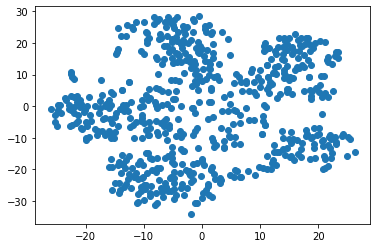

In [53]:
# Visually inspect results by 
x_plot = transformed_features[:,0]
y_plot = transformed_features[:,1]
plt.scatter(x_plot, y_plot)
plt.show()

# Part 3: Perform a Cluster Analysis with K-means
Create an elbow plot to identify the best number of clusters. Make sure to do the following:

Use a for loop to determine the inertia for each k between 1 through 10.

If possible, determine where the elbow of the plot is, and at which value of k it appears.

In [45]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(transformed_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

c:\Users\jess9\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,253267.734375
1,2,136763.281250
2,3,90386.406250
3,4,60445.699219
4,5,39273.386719


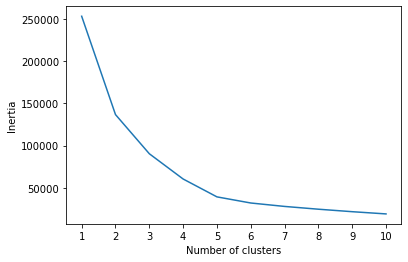

In [46]:
# Plot the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [56]:
# Fit the model clusters to the model and add to df on a 'class' column
model = KMeans(n_clusters=5, random_state=0)
model.fit(transformed_features)
predictions = model.predict(transformed_features)
df_1["class"] = model.labels_
df_1.sort_values(by= ['class'])

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,class
408,6,0.397,22.660000,3.288,3.542,15.83,10,2,12,0,4,34,0,0,0
103,6,1.461,21.110001,3.396,3.668,14.05,21,7,0,0,11,32,0,0,0
415,6,0.265,22.100000,3.544,3.696,14.86,20,8,0,1,4,31,0,0,0
101,6,1.340,22.410000,3.784,3.780,14.85,10,1,1,4,5,22,0,0,0
418,6,0.735,22.780001,3.464,3.598,15.72,12,2,1,0,0,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,7,0.688,22.389999,3.464,3.738,15.18,22,0,0,0,27,27,0,1,4
429,6,0.815,22.959999,3.596,3.512,15.85,14,1,1,1,18,26,0,1,4
94,6,1.178,21.610001,3.212,3.724,14.68,20,0,2,0,4,8,0,1,4
401,6,0.809,21.080000,3.370,3.452,14.26,2,1,1,1,2,10,0,1,4


In [58]:
df_1['class'].unique()

array([1, 0, 4, 3, 2])

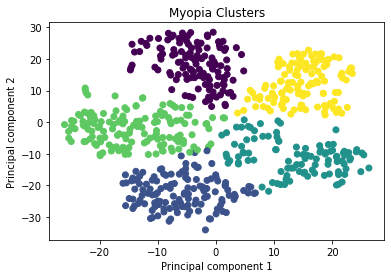

In [54]:
# Plot Myopia clusters
plt.scatter(x=x_plot, y= y_plot, c=df_1['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Myopia Clusters')
plt.show()

# Part 4: Make a Recommendation
Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. 

*Can the patients be clustered? If so, into how many clusters?

Based on the analysis made, the elbow curve had its most distinctive deflection in at 5 clusters. Therefore,  Myopia patients can be divided into 5 clusters as displayed in the plot above. 